<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<br></br>
#### Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot 

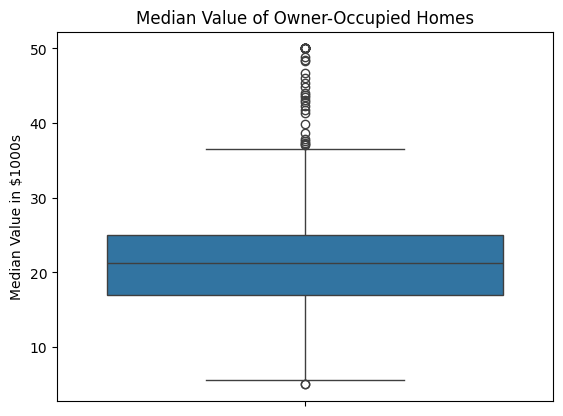

In [7]:
# Create box plot
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value in $1000s')
pyplot.show()

`The median value for owner-occupied homes is around $21,000. There appear to be quite a few outliers above the $36,000 mark.`

<br></br>
#### Task 2.2: Provide a bar plot for the Charles river variable

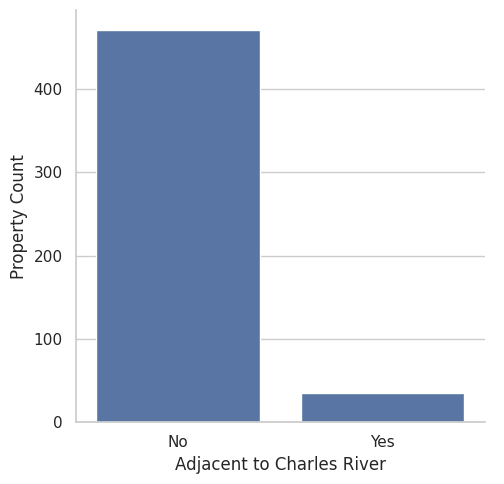

In [21]:
# Create bar plot
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.xlabel('Adjacent to Charles River')
pyplot.ylabel('Property Count')
pyplot.xticks([0, 1], ['No', 'Yes'])  # Change 0 to "No" and 1 to "Yes"
pyplot.show()

`The majority of homes in our dataset are clearly not adjacent to the Charles River. `

<br></br>
#### Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) 

In [28]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 - 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

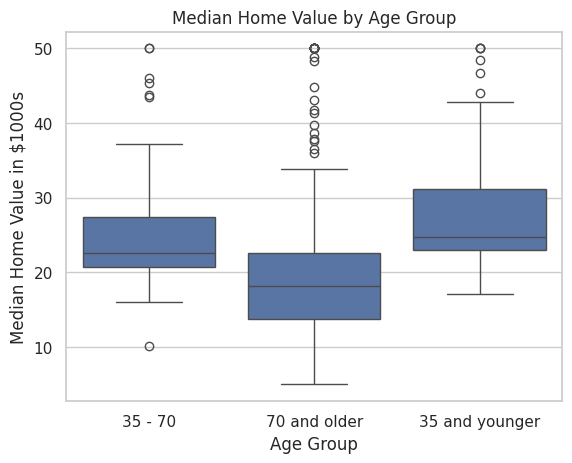

In [29]:
# Create boxplot
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.title('Median Home Value by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Home Value in $1000s')
pyplot.show()

`Properties in the age group 35 and yonger have the highest median home value, suggesting that newer properties may be more valuable on average.
Properties in the age group 70 and older have the lowest median home value, possibly due to age related issues.
Properties in the age group 35-70 have median home value in netween the other age groups.`

<br></br>
#### Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Nitric Oxide Concentration')

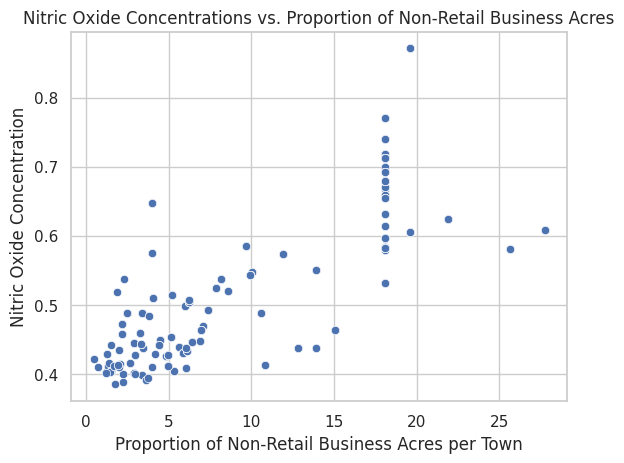

In [37]:
# Create scatter plot
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town')
pyplot.ylabel('Nitric Oxide Concentration')
pyplot.show()

`In general there is a positive association between the proportion of non-retail business acres and Nitric oxide concentration, i.e. in general, as the proportion of non-retail business acres increases, so does Nitric oxide concentration. `

<br></br>
#### Task 2.5: Create a histogram for the pupil to teacher ratio variable

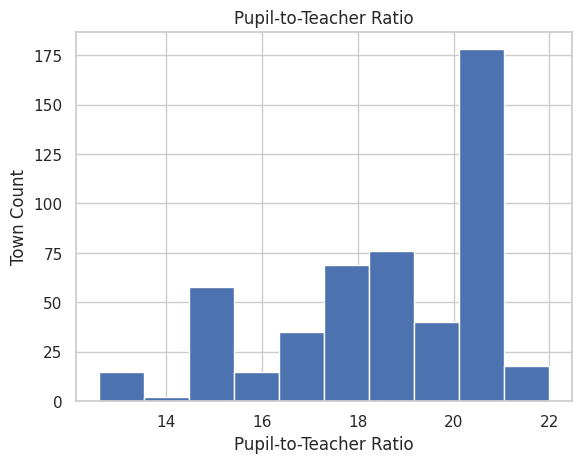

In [39]:
# Create histogram
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Town Count')
pyplot.show()

`Most towns have a pupil-to-teacher ratio of around 18-20 pupils per teacher`

<br></br>
#### Task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not?

In [42]:
# Run T-Test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<u>Hypothesis H0 (Null)</u>:<br>
µ1 = µ2 (No significant difference in median value of houses bounded v not bounded by Charles River)<br>
<u>Hypothesis H1 (Alternative)</u>:<br>
µ1 ≠ µ2 (Significant difference in median value of houses bounded v not bounded by Charles River)

<br><u>Conclusion:</u><br>
The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value of houses based on whether they are bounded by the Charles River or not.

<br><br>
#### Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [43]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 - 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

In [44]:
# Separate the age groups into three seperate variables
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '35 - 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [50]:
# Run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<u>Hypothesis H0 (Null)</u>:<br>
µ1 = µ2 (No significant difference in median value of houses across different proportions of owner-occupied homes built prior to 1940)
<br>
<u>Hypothesis H1 (Alternative)</u>:<br>
µ1 ≠ µ2 (Significant difference in median value of houses across different proportions of owner-occupied homes built prior to 1940)

<br><u>Conclusion:</u><br>
The p-value is far less than the alpha (α) level of 0.05, so we reject the null hypothesis. There is evidence of a significant difference in the median value of houses across different proportions of owner-occupied homes built prior to 1940.

<br></br>
#### Task 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [47]:
# Run Pearson correlation test
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<u>Hypothesis H0 (Null)</u>:<br>
r = 0 (No significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town)
<br>
<u>Hypothesis H1 (Alternative)</u>:<br>
r ≠ 0 (Significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town)

<br><u>Conclusion:</u><br>
The p-value is less than the alpha (α) level of 0.05, so we reject the null hypothesis. The results suggest that there is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres in the various towns.

<br></br>
#### Task 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) 

In [49]:
## X is the input variables (or independent variables)
X = boston_df[['DIS']]
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        12:53:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<u>Hypothesis H0 (Null)</u>:<br>
β₁ = 0 (No significant relationship between weighted distance to employment centers and median value of owner-occupied homes)
<br>
<u>Hypothesis H1 (Alternative)</u>:<br>
β₁ ≠ 0 (Significant relationship between weighted distance to employment centers and median value of owner-occupied homes)

<br><u>Conclusion:</u><br>
The p-value is 0, which is less than the alpha (α) level of 0.05, so we reject the null hypothesis. The results suggest that there is a significant relationship between the weighted distance to employment centers and the median value of owner-occupied homes, so distance to employment centers does impact the median home value.